**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Ouliers Treatment
5. Modelling
6. Final analysis and recomendations

# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#connect with google drive
from google.colab import files

In [ ]:
import io
uploaded = files.upload()

Saving Online+Retail.csv to Online+Retail.csv


In [ ]:
#identify the encoding type of CSV
# install the chardet library
#!pip install chardet

# import the chardet library
import chardet 

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open("Online+Retail.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
retails_df = pd.read_csv(io.BytesIO(uploaded['Online+Retail.csv']), encoding='ISO-8859-1')

In [ ]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#get the shape of dataset
retails_df.shape

(541909, 8)

In [ ]:
#get the info of dataset
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Check Missing Values

In [ ]:
round(retails_df.isnull().sum()/len(retails_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

**25%** values are missing in **CustomerID** column but we can't drop that column because it is important. So we will Drop the missing values rows.

## Drop Missing Values

In [ ]:
retails_df.dropna(axis=0, inplace=True)

In [ ]:
#check the shape now
retails_df.shape

(406829, 8)

In [ ]:
#check the info of dataset
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# 3. Preprocess The Data

Clustering works on :RFM


1.   R: Recency : how recently the orders doing
2.   F: Freqency: No of Transactions
3.   M: Monetary: Total amount of Transactions




In [ ]:
#create amount column i.e. quantity * unitprice
retails_df['amount'] = retails_df['Quantity'] * retails_df['UnitPrice']

In [ ]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#we can see that InvoiceDate is object we need to convert into DateTime object
retails_df['InvoiceDate'] = pd.to_datetime(retails_df['InvoiceDate'], format= '%d-%m-%Y %H:%M')

In [ ]:
#create new column diff from current date to order date
#get the max date
max_date = max(retails_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
retails_df['diff'] = max_date - retails_df['InvoiceDate']

In [ ]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [ ]:
#Get the total amount of orders on the basis of customerid ie. Monetary
grouped_df = retails_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#get the total no of InvoiceNo on the basis of customerid i.e. Freaqency
frequency_df = retails_df.groupby('CustomerID')['InvoiceNo'].count()
frequency_df = frequency_df.reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#Merge this 2 dfs 
grouped_df = pd.merge(grouped_df, frequency_df, on='CustomerID', how='inner')

In [ ]:
grouped_df.head()

,CustomerID,amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
#change cloumn names
grouped_df.columns = ['CustomerID', 'amount', 'frequency']
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
#create a df with minimum order range on the basis of customerid ie. recency
recency_df = retails_df.groupby('CustomerID')['diff'].min()
recency_df = recency_df.reset_index()
recency_df.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# extract only days from diff column
recency_df['diff'] = recency_df['diff'].dt.days
recency_df.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
#merge with main df
grouped_df = pd.merge(grouped_df, recency_df, on='CustomerID', how="inner")
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
grouped_df.columns= ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# 4. Outlier Treatments

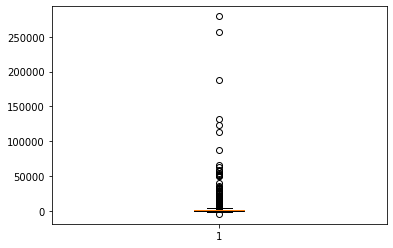

In [ ]:
plt.boxplot(grouped_df['amount'])
plt.show()

Clearly we can see that there are lot of ouliers might be they are hifg ranged customers. On the basis of domain knowledge we can keep them if required by client

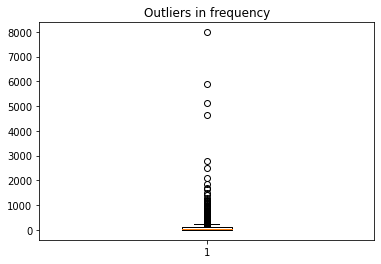

In [ ]:
plt.title('Outliers in frequency')
plt.boxplot(grouped_df['frequency'])
plt.show()

Clearly we can see that there are lot of ouliers might be they are high ranged customers. On the basis of domain knowledge we can keep them if required by client

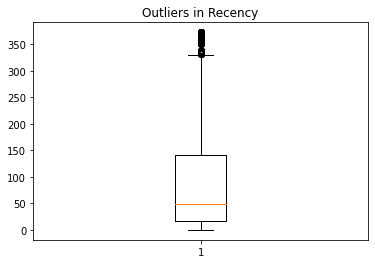

In [ ]:
plt.title('Outliers in Recency')
plt.boxplot(grouped_df['recency'])
plt.show()

There are a lot of customers those didn't make any transaction in approx 335 days.

### Remove Statistical Outliers

In [ ]:
#remove ouliers from amount
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

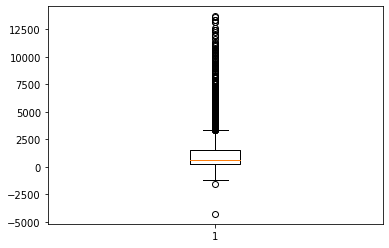

In [ ]:
plt.boxplot(grouped_df['amount'])
plt.show()

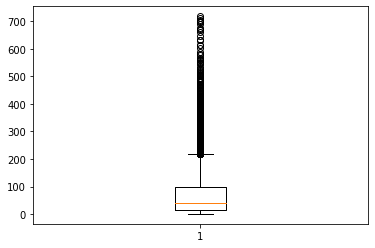

In [ ]:
plt.boxplot(grouped_df['frequency'])
plt.show()

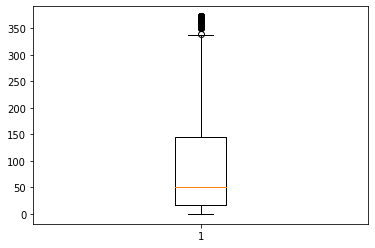

In [ ]:
plt.boxplot(grouped_df['recency'])
plt.show()

### Rescalling the data

In [ ]:
rfm_df = grouped_df[['amount', 'frequency', 'recency']]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [ ]:
scaler = StandardScaler() #Instantiate
rfm_scaled_df = scaler.fit_transform(rfm_df) # Fit and transform
rfm_scaled_df.shape

(4293, 3)

In [ ]:
rfm_scaled_df

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [ ]:
#covert series into dataframe

scale_df = pd.DataFrame(rfm_scaled_df)
scale_df.columns = ['amount', 'frequency', 'recency']
scale_df.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 5. Modelling

In [ ]:
#start with random k = 2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(scale_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

# Find Optimal value of K

### Elbow Method/SSD

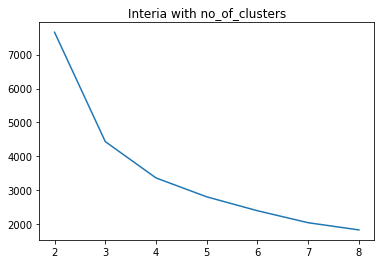

In [ ]:
ssd = []
n_cluster_range = [2,3,4,5,6,7,8]

for n_cluster in n_cluster_range:
  kmeans = KMeans(n_clusters=n_cluster, max_iter=50)
  kmeans.fit(scale_df)

  ssd.append(kmeans.inertia_)

#plot the ssd value corresponding to cluster
plt.title('Interia with no_of_clusters')
plt.plot(n_cluster_range, ssd)
plt.show()

#### As we can see after k =3 decerease in inertia is not steep. So we can take **3** as **Optimal value** of k.

### Silohouette Analysis

In [ ]:
#calculate silohouette score for optimal value of k
for n_cluster in n_cluster_range:
  kmeans = KMeans(n_clusters=n_cluster, max_iter=50)
  kmeans.fit(scale_df)

  clusters_label = kmeans.labels_

  sillohuette_avg = silhouette_score(scale_df, clusters_label)

  print(f"Sillhoutte score for {n_cluster} is: {sillohuette_avg}")

Sillhoutte score for 2 is: 0.5415858652525395
Sillhoutte score for 3 is: 0.5084896296141937
Sillhoutte score for 4 is: 0.477782010021685
Sillhoutte score for 5 is: 0.4638787576606892
Sillhoutte score for 6 is: 0.4169897163641209
Sillhoutte score for 7 is: 0.4159931495011504
Sillhoutte score for 8 is: 0.40874792429309126


Sillhoutte score for k=2 is maximum but it is not optimal according to bussiness problem. We can see that not much diff between score of 3 and 2. That's why we can go with k =3 

**From Elbow method and Sillhoutte score we get k =3 So we will build final model with k =3 **

# Final Model

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter = 50)
kmeans.fit(scale_df)
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
#merge label with main df
grouped_df['cluster_id'] = kmeans.labels_

In [ ]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


# Visualize The Final Model

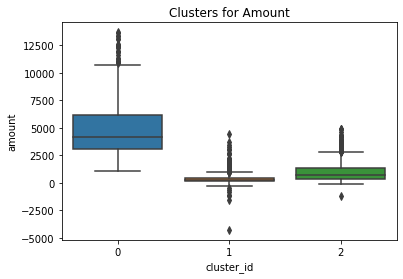

In [ ]:
plt.title('Clusters for Amount')
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)
plt.show()

### Observations:

*   Cluster 0: High amount cutomers
*   Cluster 1: Low amount cutomers
*   Cluster 2: Medium amount cutomers



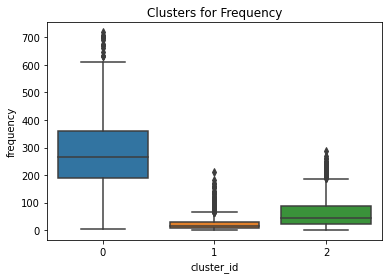

In [ ]:
plt.title('Clusters for Frequency')
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)
plt.show()

### Observations:

*   Cluster 0: High frequency cutomers
*   Cluster 1: Low frequency cutomers
*   Cluster 2: Medium frequency cutomers



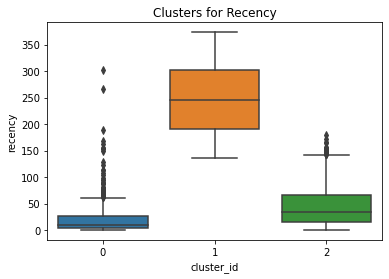

In [ ]:
plt.title('Clusters for Recency')
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)
plt.show()

### Observations:
Recency is vice versa that Frequency and Amount. Because Active customers will be Those who have minimum gap between the transactions

*   Cluster 0: Highly active cutomers
*   Cluster 1: very less active cutomers as gap of no_of_days transaction is more that 150
*   Cluster 2: Averge active cutomers
